In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from joblib import dump
from joblib import load
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO


In [2]:
def read_parquet_files(file_path):
    data_dir = Path(file_path)
    df = pd.concat(
            pd.read_parquet(parquet_file)
            for parquet_file in data_dir.glob('*.parquet')
        )
    return df

In [5]:
touch_down_df = read_parquet_files('../dataset/filterdata/touchdown/')

print(touch_down_df.index.is_unique)

touch_down_df.head()

False


,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2018-12-30T23:44:27.500,115.15,15.12,3.47,1.6,0.34,113.72,111.08,touchdown,35509,Ed Dickson,84,TE,home,115,2018123015,3202,left
1,2018-12-30T23:44:27.500,101.76,14.73,1.57,0.41,0.16,92.5,89.46,touchdown,39015,Derrick Coleman,32,FB,away,115,2018123015,3202,left
2,2018-12-30T23:44:27.500,69.03,10.9,1.33,0.4,0.14,108.86,118.47,touchdown,39232,Neiko Thorpe,23,CB,home,115,2018123015,3202,left
3,2018-12-30T23:44:27.500,98.68,17.22,3.65,1.09,0.37,111.12,99.35,touchdown,39952,Barkevious Mingo,51,OLB,home,115,2018123015,3202,left
4,2018-12-30T23:44:27.500,106.8,12.64,4.54,1.27,0.46,93.37,89.42,touchdown,41339,Maurice Alexander,35,SS,home,115,2018123015,3202,left


In [18]:
cordinates = touch_down_df[['x', 'y']]
cord = cordinates.groupby(level=0).first()
cord.size

138

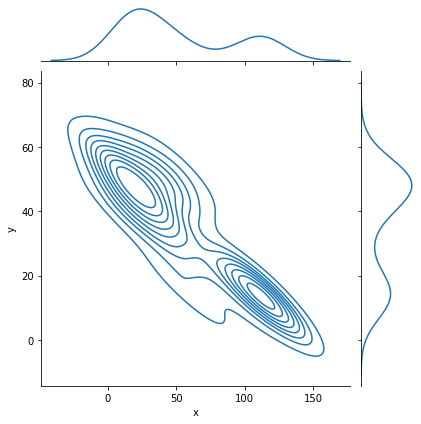

In [17]:
sns.jointplot(x=cord["x"].astype(float), y=cord["y"].astype(float), kind='kde')

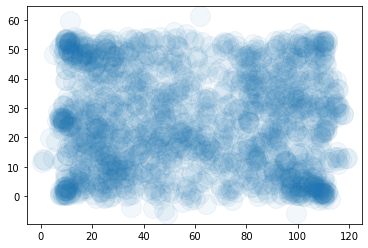

In [26]:
plt.scatter(x=cordinates["x"].astype(float), y=cordinates["y"].astype(float), alpha=.06, s=400)
plt.show()